In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json
from os.path import expanduser
import peakutils
import pickle

In [2]:
RUN_NAME = 'P3856_YHE211_1_Slot1-1_1_5104'
EXPERIMENT_NAME = 'P3856'
# EXPERIMENT_DIR = '/media/big-ssd/experiments/{}'.format(EXPERIMENT_NAME)
EXPERIMENT_DIR = '/Users/darylwilding-mcbride/Downloads/experiments/{}'.format(EXPERIMENT_NAME)
FEATURES_3DID_FILE = '/Users/darylwilding-mcbride/Downloads/results-P3856-3did/interim/features-segment-30.pkl'

In [3]:
features_df = pd.read_pickle(FEATURES_3DID_FILE)

In [4]:
print('{} features in this segment'.format(len(features_df)))

1254 features in this segment


In [53]:
features_df.sort_values(by=['coelution_coefficient'], ascending=False, inplace=True)
features_df.tail(n=100).sample(n=3)[['mono_mz','rt_apex','scan_apex','coelution_coefficient']]

,mono_mz,rt_apex,scan_apex,coelution_coefficient
912,685.839756,1916.672233,664.0,0.713229
1165,680.011470,1803.940742,689.0,0.783901
504,695.394233,1877.506409,536.0,0.828591


In [54]:
selected_feature = features_df.loc[912]

#### retention time similarity

In [55]:
max_intensity = 0
min_rt = np.finfo(0.0).max
max_rt = np.finfo(0.0).min
for isotope in selected_feature.isotopic_peaks:
    rt_df = pd.DataFrame(isotope['rt_df'])
    max_intensity = max(max_intensity, rt_df.intensity.max())
    max_rt = max(max_rt, rt_df.retention_time_secs.max())
    min_rt = min(min_rt, rt_df.retention_time_secs.min())

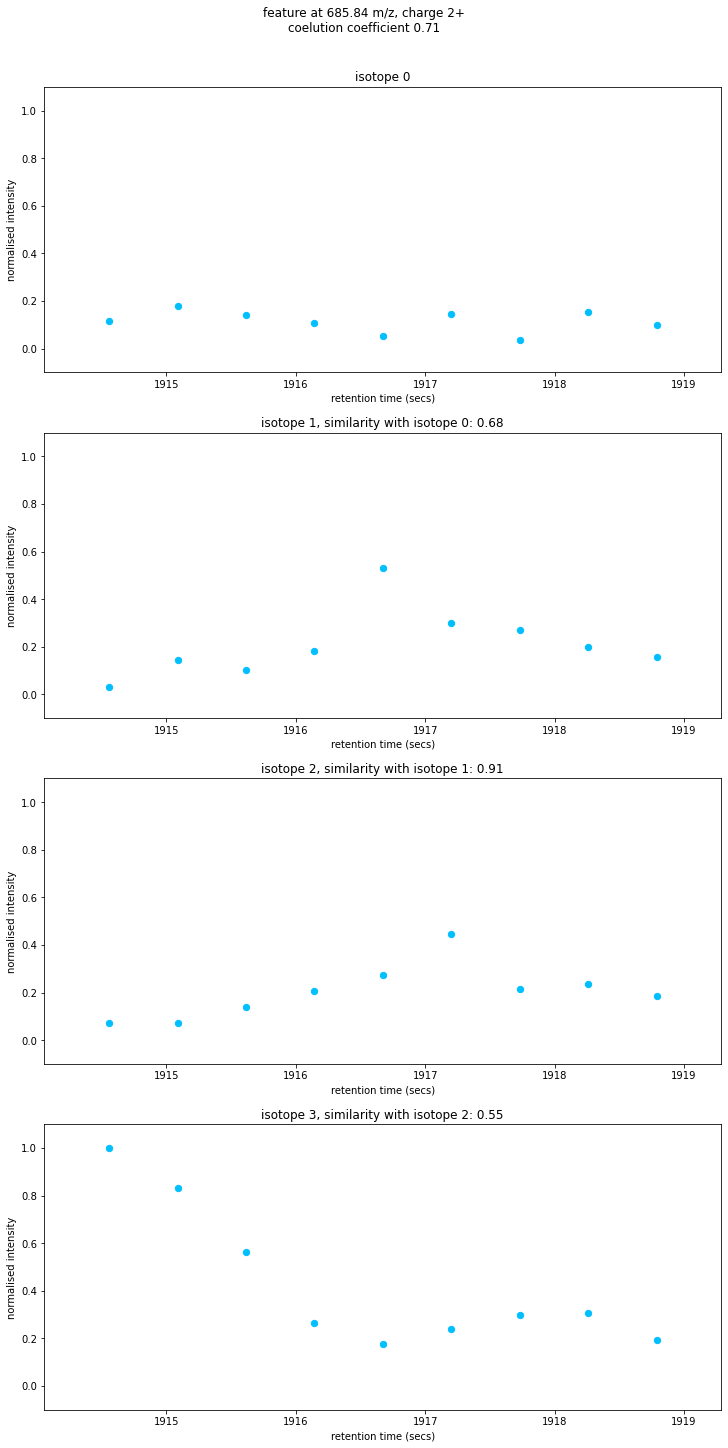

In [56]:
f, axarr = plt.subplots(nrows=len(selected_feature.isotopic_peaks), ncols=1, constrained_layout=True)
f.suptitle('feature at {} m/z, charge {}+\ncoelution coefficient {}'.format(round(selected_feature.mono_mz,2), selected_feature.charge, round(selected_feature.coelution_coefficient,2), fontsize=18))
f.set_figheight(len(selected_feature.isotopic_peaks)*5)
f.set_figwidth(10)

# plot the features derived from deconvoluting the peaks
for idx,isotope in enumerate(selected_feature.isotopic_peaks):
    if len(selected_feature.isotopic_peaks) > 1:
        ax = axarr[idx]  # row, column
    else:
        ax = axarr

    # plot the raw data
    rt_df = pd.DataFrame(isotope['rt_df'])
    rt_df['normalised_intensity'] = rt_df.intensity / max_intensity
    ax.scatter(rt_df.retention_time_secs, rt_df.normalised_intensity, s=40, c='deepskyblue', label='summed points')

    nearest = 1.0
    range_l = round(rt_df.retention_time_secs.min() / nearest) * nearest
    range_u = round(rt_df.retention_time_secs.max() / nearest) * nearest
    ax.set_xticks(np.arange(range_l,range_u+nearest,nearest))

    ax.set_xlabel('retention time (secs)')
    ax.set_ylabel('normalised intensity')
    # ax.legend(loc='best')
    if idx > 0:
        ax.set_title('isotope {}, similarity with isotope {}: {}'.format(idx, idx-1, round(isotope['similarity_rt'],2)))
    else:
        ax.set_title('isotope {}'.format(idx))
    ax.set_xlim((min_rt-0.5,max_rt+0.5))
    ax.set_ylim((-0.1,1.1))
plt.show()

#### mobility similarity

In [57]:
max_intensity = 0
min_scan = np.iinfo(0).max
max_scan = np.iinfo(0).min
for isotope in selected_feature.isotopic_peaks:
    scan_df = pd.DataFrame(isotope['scan_df'])
    max_intensity = max(max_intensity, scan_df.intensity.max())
    max_scan = max(max_scan, scan_df.scan.max())
    min_scan = min(min_scan, scan_df.scan.min())    

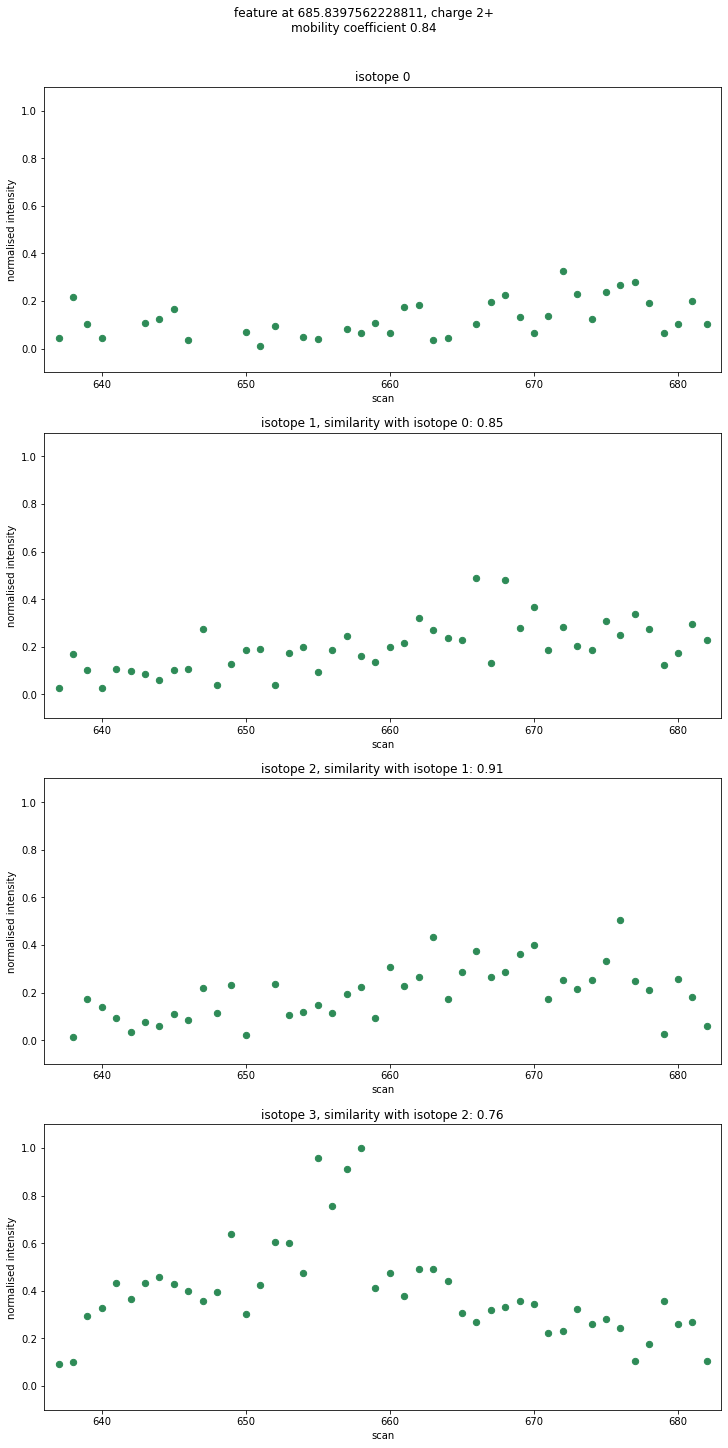

In [58]:
f, axarr = plt.subplots(nrows=len(selected_feature.isotopic_peaks), ncols=1, constrained_layout=True)
f.suptitle('feature at {}, charge {}+\nmobility coefficient {}'.format(selected_feature.mono_mz, selected_feature.charge, round(selected_feature.mobility_coefficient,2), fontsize=18))
f.set_figheight(len(selected_feature.isotopic_peaks)*5)
f.set_figwidth(10)

# plot the features derived from deconvoluting the peaks
for idx,isotope in enumerate(selected_feature.isotopic_peaks):
    if len(selected_feature.isotopic_peaks) > 1:
        ax = axarr[idx]  # row, column
    else:
        ax = axarr

    # plot the raw data
    scan_df = pd.DataFrame(isotope['scan_df'])
    scan_df['normalised_intensity'] = scan_df.intensity / max_intensity
    ax.scatter(scan_df.scan, scan_df.normalised_intensity, s=40, c='seagreen', label='summed points')

    nearest = 10.0
    range_l = round(scan_df.scan.min() / nearest) * nearest
    range_u = round(scan_df.scan.max() / nearest) * nearest
    ax.set_xticks(np.arange(range_l,range_u+nearest,nearest))

    ax.set_xlabel('scan')
    ax.set_ylabel('normalised intensity')
    # ax.legend(loc='best')
    if idx > 0:
        ax.set_title('isotope {}, similarity with isotope {}: {}'.format(idx, idx-1, round(isotope['similarity_scan'],2)))
    else:
        ax.set_title('isotope {}'.format(idx))
    ax.set_xlim((min_scan-1,max_scan+1))
    ax.set_ylim((-0.1,1.1))
plt.show()